In [ ]:
# Importamos librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pyreadstat
import pyreadstat
import os
from google.colab import files
from google.colab import drive
from typing import Collection
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


CORRECCIONES TP3
1) drop de aglomerado para ambos df


In [ ]:
# Cargo archivo DTA individual

df_2004 = pd.read_stata("/content/drive/MyDrive/tp3/Individual_t104.dta")

print(df_2004.head())
#aglomerados de Ciudad Autónoma de Buenos Aires (32) y Gran Buenos Aires (33)
df_2004.drop(df_2004[df_2004["aglomerado"].isin([32, 33])].index, inplace=True)

# Cambiamos los nombres de las columnas a minúsculas
df_2004.columns = df_2004.columns.str.lower()
df_2004

     CODUSU  nro_hogar componente h15    ano4       trimestre  \
0  125098          1.0        1.0  Sí  2004.0  1er. Trimestre   
1  125397          1.0        1.0  Sí  2004.0  1er. Trimestre   
2  125515          1.0        1.0  Sí  2004.0  1er. Trimestre   
3  125558          1.0        1.0  Sí  2004.0  1er. Trimestre   
4  125558          1.0        2.0  Sí  2004.0  1er. Trimestre   

              region mas_500              aglomerado  pondera  ... deccfr  \
0  Gran Buenos Aires       S  Ciudad de Buenos Aires   1299.0  ...     07   
1  Gran Buenos Aires       S  Ciudad de Buenos Aires   2018.0  ...     00   
2  Gran Buenos Aires       S  Ciudad de Buenos Aires   1486.0  ...     07   
3  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   
4  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   

  ideccfr rdeccfr gdeccfr pdeccfr adeccfr pj1_1 pj2_1 pj3_1 idimpp  
0              06      06              04   0.0   0.0   0.0  00000  
1       

,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.0,...,07,,06,06,,04,0.0,0.0,0.0,00000
1,125397,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,2018.0,...,00,,00,00,,00,0.0,0.0,0.0,00000
2,125515,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.0,...,07,,07,07,,05,0.0,0.0,0.0,00020
3,125558,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
4,125558,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45284,285733,1.0,1.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
45285,285733,1.0,2.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
45286,285733,1.0,3.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
45287,285733,1.0,4.0,0.0,2004.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000


In [ ]:
# corrijo error de drop en aglomerado
print(df_2004["aglomerado"].unique())

['Ciudad de Buenos Aires', 'Partidos del GBA', 'Santiago del Estero - La Banda', 'Jujuy - Palpalá', 'Gran Catamarca', ..., 'Río Cuarto', 'Comodoro Rivadavia - Rada Tilly', 'Neuquén - Plottier', 'Río Gallegos', 'Ushuaia - Río Grande']
Length: 29
Categories (29, object): ['Gran La Plata' < 'Bahía Blanca - Cerri' < 'Gran Rosario' < 'Gran Santa Fe' <
                          ... < 'Ciudad de Buenos Aires' < 'Partidos del GBA' <
                          'Mar del Plata - Batán' < 'Río Cuarto']


In [ ]:
#me quedo solo CABA y GBA
df_2004 = df_2004[df_2004["aglomerado"].isin(["Ciudad de Buenos Aires", "Partidos del GBA"])]
df_2004["aglomerado"] = df_2004["aglomerado"].replace({"Ciudad de Buenos Aires": "CABA", "Partidos del GBA": "GBA"})
print(df_2004["aglomerado"].unique())

['CABA', 'GBA']
Categories (29, object): ['Gran La Plata' < 'Bahía Blanca - Cerri' < 'Gran Rosario' < 'Gran Santa Fe' <
                          ... < 'CABA' < 'GBA' < 'Mar del Plata - Batán' < 'Río Cuarto']


<ipython-input-9-64503d83d6e0>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_2004["aglomerado"] = df_2004["aglomerado"].replace({"Ciudad de Buenos Aires": "CABA", "Partidos del GBA": "GBA"})
<ipython-input-9-64503d83d6e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2004["aglomerado"] = df_2004["aglomerado"].replace({"Ciudad de Buenos Aires": "CABA", "Partidos del GBA": "GBA"})


In [ ]:
df_2004[['nivel_ed']]

,nivel_ed
0,Secundaria Incompleta
1,Primaria Completa
2,Primaria Completa
3,Primaria Completa
4,Superior Universitaria Completa
...,...
7642,Sin instrucción
7643,Primaria Completa
7644,Primaria Completa
7645,Primaria Incompleta (incluye educación especial)


In [ ]:
# Cargo el archivo xlsx

df_2024 = pd.read_excel("/content/drive/MyDrive/tp3/usu_individual_T124.xlsx")
# Cambiamos los nombres de las columnas a minúsculas
df_2024.columns = df_2024.columns.str.lower()
df_2024

,codusu,ano4,trimestre,nro_hogar,componente,h15,region,mas_500,aglomerado,pondera,...,pdecifr,adecifr,ipcf,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pondih
0,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,3,1,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
1,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,4,1,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
2,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,5,0,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
3,TQRMNOPPWHLLKRCDEGGFB00852574,2024,1,1,1,1,42,S,10,675,...,NaN,8,212500.0,6,6.0,6,6.0,NaN,6,1610
4,TQRMNOPPWHLLKRCDEGGFB00852574,2024,1,1,2,1,42,S,10,675,...,NaN,8,212500.0,6,6.0,6,6.0,NaN,6,1610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46045,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,1,1,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46046,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,2,2,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46047,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,3,2,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46048,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,4,2,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0


In [ ]:
print(df_2024["aglomerado"].unique())

[10  7 18 25  8  5 19 30 15 27 26 29  4 36 93 91 13  2 12 20  3 34 33 22
  9  6 17 31 23 38 32 14]


In [ ]:
df_2024[['nivel_ed']]

,nivel_ed
0,3
1,5
2,7
3,4
4,4
...,...
46045,3
46046,3
46047,3
46048,3


In [ ]:
# Corrijo drop en df 2024. Me quedo con valores de aglomerado 32 33( Ciudad Autónoma de Buenos Aires y Partidos del GBA)
# 'aglomerado' 33 o 32 en df_2024
df_2024 = df_2024[df_2024["aglomerado"].isin([33, 32])]
df_2024["aglomerado"] = df_2024["aglomerado"].replace({33: "CABA", 32: "GBA"})
print(df_2024["aglomerado"].unique())
df_2024

['CABA' 'GBA']


<ipython-input-14-186783114e35>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024["aglomerado"] = df_2024["aglomerado"].replace({33: "CABA", 32: "GBA"})


,codusu,ano4,trimestre,nro_hogar,componente,h15,region,mas_500,aglomerado,pondera,...,pdecifr,adecifr,ipcf,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pondih
245,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1,1,1,1,S,CABA,1810,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
246,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1,2,1,1,S,CABA,1810,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
247,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1,3,1,1,S,CABA,1810,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
255,TQSMNORWVHLLKQCDEIJAH00856914,2024,1,1,1,1,1,S,CABA,2368,...,NaN,6,500000.0,9,NaN,9,9.0,NaN,9,3324
256,TQRMNOPQQHLOLRCDEIJAH00855133,2024,1,1,1,1,1,S,CABA,1223,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46045,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,1,1,1,S,CABA,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46046,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,2,2,1,S,CABA,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46047,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,3,2,1,S,CABA,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46048,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,4,2,1,S,CABA,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0


In [ ]:
diferentes_1 = set(df_2004.columns) - set(df_2024.columns)  # Columnas que están en df_2004 pero no en df_2024
diferentes_2 = set(df_2024.columns) - set(df_2004.columns)  # Columnas que están en df_2024 pero no en df_2004

print(f"Columnas en df_2004 pero no en df_2024: {diferentes_1}")
print(f"Columnas en df_2024 pero no en df_2004: {diferentes_2}")

Columnas en df_2004 pero no en df_2024: {'idimpp', 'pj1_1', 'pj3_1', 'pj2_1'}
Columnas en df_2024 pero no en df_2004: {'pondih', 'pondiio', 'ch05', 'pondii', 'imputa'}


In [ ]:
#como ninguna nos importa especificamente, las descartamos

df_2004 = df_2004.drop(columns=['pj3_1', 'pj1_1', 'idimpp', 'pj2_1'])
df_2024 = df_2024.drop(columns=['imputa', 'pondii', 'pondiio', 'pondih', 'ch05'])

In [ ]:
# Agregar una columna para identificar el año en df_2004
df_2004['anio'] = 2004
# Agregar una columna para identificar el año en df_2024
df_2024['anio'] = 2024

In [ ]:
df_conjunto = pd.concat([df_2004, df_2024], axis=0)
# Ver el DataFrame resultante
df_conjunto

,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,pdecifr,adecifr,ipcf,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,anio
0,125098,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,CABA,1299.0,...,,01,368.0,07,,06,06,,04,2004
1,125397,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,CABA,2018.0,...,,00,0.0,00,,00,00,,00,2004
2,125515,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,CABA,1486.0,...,,02,440.0,07,,07,07,,05,2004
3,125558,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,CABA,1674.0,...,,08,532.5,08,,08,08,,06,2004
4,125558,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,CABA,1674.0,...,,08,532.5,08,,08,08,,06,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46045,TQRMNOPUQHKMKNCDEIJAH00861661,1.0,1,1,2024.0,1,1,S,CABA,3410.0,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,2024
46046,TQRMNOPUQHKMKNCDEIJAH00861661,1.0,2,2,2024.0,1,1,S,CABA,3410.0,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,2024
46047,TQRMNOPUQHKMKNCDEIJAH00861661,1.0,3,2,2024.0,1,1,S,CABA,3410.0,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,2024
46048,TQRMNOPUQHKMKNCDEIJAH00861661,1.0,4,2,2024.0,1,1,S,CABA,3410.0,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,2024


In [ ]:

# Veamos los nan de df_conjunto
missing_values_count = df_conjunto.isnull().sum()
missing_values_count = missing_values_count[missing_values_count > 0]
missing_values_count

,0
ch14,3686
ch15_cod,5865
ch16_cod,6982
pp03c,3827
pp03d,3827
...,...
pdecindr,7051
idecifr,7051
pdecifr,7051
ideccfr,7051


## TP4
##Punto 1) Exploren el diseño de registro de la base de hogar: a priori, ¿qué variables creen pueden ser predictivas de la desocupación y seria útil incluir para perfeccionar el ejercicio del TP3? Mencionen estas variables y justifiquen su elección

En el registro de la base hogar seria util incluir: iv1: Tipo de vivienda; iv2: Cantidad de ambientes/habitaciones en la vivienda; ii7: Régimen de tenencia de la vivienda; v5: ayudas sociales recibidas; ii1: Cantidad de ambientes/habitaciones exclusivas para uso del hogar; e ix_tot: Cantidad total de miembros en el hogar.

# Punto 2)

In [ ]:
#Hogar 2004 y 2024
hogar_2004 = pd.read_stata("/content/drive/MyDrive/TP4datos/Hogar_t104.dta")
hogar_2024 = pd.read_excel("/content/drive/MyDrive/TP4datos/usu_hogar_T124.xlsx")

In [ ]:
hogar_2004.columns = hogar_2004.columns.str.lower() #cambiamos tipografia
hogar_2024.columns = hogar_2024.columns.str.lower()

#me quedo solo CABA y GBA
hogar_2004 = hogar_2004[hogar_2004["aglomerado"].isin(["Ciudad de Buenos Aires", "Partidos del GBA"])]
hogar_2004["aglomerado"] = hogar_2004["aglomerado"].replace({"Ciudad de Buenos Aires": "CABA", "Partidos del GBA": "GBA"})
print(df_2004["aglomerado"].unique())

# 'aglomerado' 33 o 32 en df_2024
hogar_2024 = hogar_2024[hogar_2024["aglomerado"].isin([33, 32])]
hogar_2024["aglomerado"] = hogar_2024["aglomerado"].replace({33: "CABA", 32: "GBA"})
print(hogar_2024["aglomerado"].unique())

['CABA', 'GBA']
Categories (29, object): ['Gran La Plata' < 'Bahía Blanca - Cerri' < 'Gran Rosario' < 'Gran Santa Fe' <
                          ... < 'CABA' < 'GBA' < 'Mar del Plata - Batán' < 'Río Cuarto']
['GBA' 'CABA']


<ipython-input-21-30b46cee994c>:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hogar_2004["aglomerado"] = hogar_2004["aglomerado"].replace({"Ciudad de Buenos Aires": "CABA", "Partidos del GBA": "GBA"})
<ipython-input-21-30b46cee994c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hogar_2004["aglomerado"] = hogar_2004["aglomerado"].replace({"Ciudad de Buenos Aires": "CABA", "Partidos del GBA": "GBA"})
<ipython-input-21-30b46cee994c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [ ]:
# controlo codusu a string y nro_hogar a numero
for df in [df_conjunto, hogar_2004, hogar_2024]:
    df['codusu'] = df['codusu'].astype(str)
    df['nro_hogar'] = df['nro_hogar'].astype(int)

<ipython-input-22-d7ea66560098>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['codusu'] = df['codusu'].astype(str)
<ipython-input-22-d7ea66560098>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nro_hogar'] = df['nro_hogar'].astype(int)
<ipython-input-22-d7ea66560098>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
diferentes_h1 = set(hogar_2004.columns) - set(hogar_2024.columns)  # Columnas que están en df_2004 pero no en df_2024
diferentes_h2 = set(hogar_2024.columns) - set(hogar_2004.columns)  # Columnas que están en df_2024 pero no en df_2004

print(f"Columnas en hogar_2004 pero no en hogar_2024: {diferentes_h1}")
print(f"Columnas en hogar_2024 pero no en hogar_2004: {diferentes_h2}")

Columnas en hogar_2004 pero no en hogar_2024: {'idimph'}
Columnas en hogar_2024 pero no en hogar_2004: {'pondih'}


In [ ]:
#como ninguna nos importa especificamente, las descartamos
hogar_2004 = hogar_2004.drop(columns=['idimph'])
hogar_2024 = hogar_2024.drop(columns=['pondih'])

In [ ]:
# Agregar una columna para identificar el año en hogar_2004
hogar_2004['anio'] = 2004
# Agregar una columna para identificar el año en hogar_2024
hogar_2024['anio'] = 2024

In [ ]:
df_hogares = pd.concat([hogar_2004, hogar_2024], axis=0)
# Ver el DataFrame resultante
df_hogares

,codusu,nro_hogar,realizada,ano4,trimestre,region,mas_500,aglomerado,pondera,iv1,...,gdeccfr,pdeccfr,adeccfr,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4,anio
9666,125098,1,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,CABA,1299.0,Departamento,...,06,,04,1.0,0.0,98.0,0.0,0.0,0.0,2004
9667,125397,1,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,CABA,2018.0,Departamento,...,00,,00,1.0,0.0,98.0,0.0,0.0,0.0,2004
9668,125515,1,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,CABA,1486.0,Departamento,...,07,,05,1.0,0.0,98.0,0.0,0.0,0.0,2004
9669,125558,1,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,CABA,1674.0,Departamento,...,08,,06,2.0,0.0,3.0,4.0,0.0,0.0,2004
9670,125599,1,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,CABA,1471.0,Casa,...,04,,02,2.0,0.0,1.0,0.0,0.0,0.0,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15983,TQRMNOPSSHKMROCDEIJAH00861731,1,1,2024.0,1,1,S,CABA,3772.0,1,...,10.0,NaN,10,1,0,96,0,0,0,2024
15984,TQRMNOPWVHJLSSCDEIJAH00794914,1,1,2024.0,1,1,S,CABA,1862.0,1,...,2.0,NaN,2,4,2,98,0,0,0,2024
15985,TQRMNOQQWHKMOQCDEIJAH00861732,1,1,2024.0,1,1,S,CABA,2639.0,1,...,12.0,NaN,12,2,0,98,0,0,0,2024
15986,TQRMNOSXRHKMNMCDEIJAH00861733,1,1,2024.0,1,1,S,CABA,1497.0,2,...,10.0,NaN,10,1,0,98,0,0,0,2024


In [ ]:
# Veamos que columnas tienen nan de df_hogares
missing_values_count = df_hogares.isnull().sum()
print(missing_values_count[missing_values_count > 0])

iv1_esp     2541
iv3_esp     2543
iv7_esp     2540
ii7_esp     2538
ii8_esp     2448
ix_men10    1576
idecifr     2545
pdecifr     2545
ideccfr     2545
pdeccfr     2545
dtype: int64


In [ ]:
# Realizar el merge entre df_conjunto (individual) y df_hogares (hogares)
df_merged = pd.merge(df_conjunto, df_hogares, how='left', on=['codusu', 'nro_hogar'])

# Revisar el resultado
print(df_merged)

                              codusu  nro_hogar componente h15  ano4_x  \
0                           125098            1        1.0  Sí  2004.0   
1                           125397            1        1.0  Sí  2004.0   
2                           125515            1        1.0  Sí  2004.0   
3                           125558            1        1.0  Sí  2004.0   
4                           125558            1        2.0  Sí  2004.0   
...                              ...        ...        ...  ..     ...   
14693  TQRMNOPUQHKMKNCDEIJAH00861661          1          1   1  2024.0   
14694  TQRMNOPUQHKMKNCDEIJAH00861661          1          2   2  2024.0   
14695  TQRMNOPUQHKMKNCDEIJAH00861661          1          3   2  2024.0   
14696  TQRMNOPUQHKMKNCDEIJAH00861661          1          4   2  2024.0   
14697  TQRMNOPUQHKMKNCDEIJAH00861661          1          5   2  2024.0   

          trimestre_x           region_x mas_500_x aglomerado_x  pondera_x  \
0      1er. Trimestre  Gran Bueno

In [ ]:
# eliminar las duplicadas

for col in df_merged.columns:
    if col.endswith("_x") or col.endswith("_y"):
        base_col = col[:-2]  # nombre de la columna (sin el sufijo)
        if f"{base_col}_x" in df_merged.columns and f"{base_col}_y" in df_merged.columns:
            # Si existen ambas versiones, conservar solo '_x'
            df_merged[base_col] = df_merged[f"{base_col}_x"]  # Renombrar y conservar '_x'
            df_merged.drop(columns=[f"{base_col}_x", f"{base_col}_y"], inplace=True)
        elif f"{base_col}_x" in df_merged.columns:
            # Si solo existe '_x', quitar el sufijo
            df_merged.rename(columns={f"{base_col}_x": base_col}, inplace=True)
        elif f"{base_col}_y" in df_merged.columns:
            # Si solo existe '_y', quitar el sufijo
            df_merged.rename(columns={f"{base_col}_y": base_col}, inplace=True)

df_merged

,codusu,nro_hogar,componente,h15,ch03,ch04,ch06,ch07,ch08,ch09,...,pdecifr,adecifr,ipcf,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,anio
0,125098,1,1.0,Sí,Jefe,Varón,79.0,Viudo,Obra social (incluye PAMI),Sí,...,,01,368.0,07,,06,06,,04,2004
1,125397,1,1.0,Sí,Jefe,Mujer,67.0,Separado o divorciado,No paga ni le descuentan,Sí,...,,00,0.0,00,,00,00,,00,2004
2,125515,1,1.0,Sí,Jefe,Mujer,74.0,Viudo,Obra social (incluye PAMI),Sí,...,,02,440.0,07,,07,07,,05,2004
3,125558,1,1.0,Sí,Jefe,Varón,54.0,Casado,Mutual/Prepaga/Servicio de emergencia,Sí,...,,08,532.5,08,,08,08,,06,2004
4,125558,1,2.0,Sí,Cónyuge/Pareja,Mujer,51.0,Casado,Mutual/Prepaga/Servicio de emergencia,Sí,...,,08,532.5,08,,08,08,,06,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14693,TQRMNOPUQHKMKNCDEIJAH00861661,1,1,1,1,2,43,3,1,1,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,2024
14694,TQRMNOPUQHKMKNCDEIJAH00861661,1,2,2,3,1,21,5,1,1,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,2024
14695,TQRMNOPUQHKMKNCDEIJAH00861661,1,3,2,3,1,20,5,1,1,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,2024
14696,TQRMNOPUQHKMKNCDEIJAH00861661,1,4,2,3,1,11,5,1,1,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,2024


In [ ]:
df_merged[['nivel_ed']]

,nivel_ed
0,Secundaria Incompleta
1,Primaria Completa
2,Primaria Completa
3,Primaria Completa
4,Superior Universitaria Completa
...,...
14693,3
14694,3
14695,3
14696,3


In [ ]:
df_merged[['realizada']]

,realizada
0,Sí
1,Sí
2,Sí
3,Sí
4,Sí
...,...
14693,1
14694,1
14695,1
14696,1


In [ ]:
# Lista de columnas categóricas
categorical_columns = [
    'ch04',  # Sexo
    'ch07',  # Estado civil
    'ch08',  # Cobertura médica
    'nivel_ed',  # Nivel educativo
    'estado',  # Condición de actividad
    'cat_inac',  # Categoría de inactividad
    'realizada',  # Entrevista realizada
    'iv1',  # Tipo de vivienda
    'ii7',  # Régimen de tenencia de la vivienda
    'v5'  # Recibe ayuda de alimentos/mercadería
]

# Iterar sobre las columnas categóricas y obtener valores únicos
for column in categorical_columns:
    if column in df_merged.columns:
        unique_values = df_merged[column].dropna().unique()  # Valores únicos excluyendo NaN
        print(f"Valores únicos en '{column}': {unique_values}")
    else:
        print(f"La columna '{column}' no existe en el DataFrame.")


Valores únicos en 'ch04': ['Varón' 'Mujer' 2 1]
Valores únicos en 'ch07': ['Viudo' 'Separado o divorciado' 'Casado' 'Soltero' 'Unido' 4 2 5 3 9 1]
Valores únicos en 'ch08': ['Obra social (incluye PAMI)' 'No paga ni le descuentan'
 'Mutual/Prepaga/Servicio de emergencia'
 'Obra social y mutual/prepaga/servicio de emergencia'
 'Planes y seguros públicos' 'Ns./Nr.'
 'Mutual/prepaga/servicio de emergencia/planes y seguros públi' 1 4 2 9 12
 23 13 3]
Valores únicos en 'nivel_ed': ['Secundaria Incompleta' 'Primaria Completa'
 'Superior Universitaria Completa' 'Superior Universitaria Incompleta'
 'Secundaria Completa' 'Primaria Incompleta (incluye educación especial)'
 'Sin instrucción' 2 6 1 4 3 7 5]
Valores únicos en 'estado': ['Inactivo' 'Ocupado' 'Desocupado' 'Menor de 10 años'
 'Entrevista individual no realizada (no respuesta al cuestion' 1 3 4 0 2]
Valores únicos en 'cat_inac': ['Jubilado/pensionado' 0.0 'Ama de casa' 'Estudiante' 'Menor de 6 años'
 'Rentista' 'Otros' 'Discapacitado' 1

In [ ]:
#Mapeo
conversiones = {
    'ch04': {
        'Varón': 1,
        'Mujer': 2
        },
    'ch07': {
        'Unido': 1,
        'Casado': 2,
        'Separado o divorciado': 3,
        'Viudo': 4,
        'Soltero': 5,
        9: None
        },
    'ch08': {
        'Obra social (incluye PAMI)':1,
        'Mutual/Prepaga/Servicio de emergencia' : 2,
        'Planes y seguros públicos': 3,
        'No paga ni le descuentan' : 4,
        'Ns./Nr.' : 9,
        'Obra social y mutual/prepaga/servicio de emergencia' : 12,
        'Obra social y planes y seguros públicos' : 13,
        'Mutual/prepaga/servicio de emergencia/planes y seguros públi' : 23
        },
    'nivel_ed': {
        'Primaria Incompleta (incluye educación especial)' : 1,
        'Primaria Completa' : 2,
        'Secundaria Incompleta' : 3,
        'Secundaria Completa' : 4,
        'Superior Universitaria Incompleta' : 5,
        'Superior Universitaria Completa' : 6,
        'Sin instrucción' : 7,
        'Ns./Nr.' : 9
        },
    'estado' : {
        'Entrevista individual no realizada (no respuesta al cuestion' : 0,
        'Ocupado' : 1,
        'Desocupado' : 2,
        'Inactivo' : 3,
        'Menor de 10 años' : 4
        },
    'cat_inac': {
        'Jubilado/pensionado' : 1,
        'Rentista' : 2,
        'Estudiante' : 3,
        'Ama de casa' : 4,
        'Menor de 6 años' : 5,
        'Discapacitado' : 6,
        'Otros' : 7,
        0.0 : 8
        },
    'realizada': {
        'Sí' : 1,
        'No (hogar no respuesta)' : 2,
        },
    'iv1': {
        'Casa' : 1,
        'Departamento' : 2,
        'Pieza en inquilinato' : 3,
        'Pieza en hotel/pensión' : 4,
        'Local no construido para habitación' : 5
        },
    'ii7': {
        'Propietario de la vivienda y el terreno' : 1,
        'Propietario de la vivienda solamente' : 2,
        'Inquilino/arrendatario de la vivienda' : 3,
        'Ocupante por pago de impuestos/expensas' : 4,
        'Ocupante gratuito (con permiso)' : 6,
        'Ocupante de hecho (sin permiso)' : 7,
        'Está en sucesión' : 8,
        'Otra situación' : 9
        },
    'v5': {
        'Sí' : 1,
        'No' : 2,
        'Ns./Nr.' : 3, },
    }

for column in categorical_columns:
    # Check if the column contains string values
    if column in df_merged.columns and df_merged[column].apply(lambda x: isinstance(x, str)).any():
        # If string values are found, replace them using the mapping
        df_merged[column] = df_merged[column].map(conversiones[column]).fillna(df_merged[column])

<ipython-input-33-cd07ada91831>:83: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged[column] = df_merged[column].map(conversiones[column]).fillna(df_merged[column])
<ipython-input-33-cd07ada91831>:83: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged[column] = df_merged[column].map(conversiones[column]).fillna(df_merged[column])
<ipython-input-33-cd07ada91831>:83: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-i

# Punto 3)

Limpien la base de datos tomando criterios que hagan sentido. Explicar cualquier decisión como el tratamiento de valores faltantes (missing values), extremos (outliers), o variables categóricas. Justifique sus decisiones.

In [ ]:
#  controlamos los nan solo de las variables que nos interesen
columnas_interes = df_merged[['anio', 'ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf', 'codusu','nro_hogar','codusu','nro_hogar','realizada', 'iv1', 'iv2', 'ii7', 'v5', 'ii1', 'ix_tot']]

for col in columnas_interes:
    if col in df_merged.columns:  # Verificar que la columna exista en el DataFrame
        missing = df_merged[col].isnull().sum()
        print(f"Nans en '{col}': {missing}")
    else:
        print(f"La columna '{col}' no existe en el DataFrame.")

Nans en 'anio': 0
Nans en 'ch04': 0
Nans en 'ch06': 0
Nans en 'ch07': 0
Nans en 'ch08': 0
Nans en 'nivel_ed': 0
Nans en 'estado': 0
Nans en 'cat_inac': 0
Nans en 'ipcf': 0
Nans en 'codusu': 0
Nans en 'nro_hogar': 0
Nans en 'codusu': 0
Nans en 'nro_hogar': 0
Nans en 'realizada': 0
Nans en 'iv1': 0
Nans en 'iv2': 0
Nans en 'ii7': 0
Nans en 'v5': 0
Nans en 'ii1': 0
Nans en 'ix_tot': 0


In [ ]:
# En EDAD ('ch06') elimino valores negativos
# primero convierto'ch06' a numerica por las dudas
df_merged['ch06'] = pd.to_numeric(df_merged['ch06'], errors='coerce')
# paso los negativos a nan
df_merged['ch06'] = df_merged['ch06'].apply(lambda x: x if x >= 0 else np.nan)
# nos fijamos cuantos son para ver si los eliminamos o los imputamos
# Contar cuántos valores son NaN en 'ch06'
na_count = df_merged['ch06'].isna().sum()
print(f"Cantidad de valores NaN en 'ch06': {na_count}")

# Convertir 'nivel_ed' a numérico
df_merged['nivel_ed'] = pd.to_numeric(df_merged['nivel_ed'], errors='coerce')

# Calcular la mediana de 'ch06' para cada nivel educativo
medianas_nivel_ed = df_merged.groupby('nivel_ed')['ch06'].median()

# Función para imputar valores NaN en 'ch06'
def imputar_edad(row):
    if pd.isna(row['ch06']):  # Si la edad es NaN
        return medianas_nivel_ed.get(row['nivel_ed'], df_merged['ch06'].median())  # Usar mediana global si no hay nivel_ed
    return row['ch06']

# Aplicar la función al DataFrame
df_merged['ch06'] = df_merged.apply(imputar_edad, axis=1)

# Verificar si quedan NaN después de la imputación
na_count_post = df_merged['ch06'].isna().sum()
print(f"Cantidad de valores NaN en 'ch06' después de la imputación: {na_count_post}")


Cantidad de valores NaN en 'ch06': 186
Cantidad de valores NaN en 'ch06' después de la imputación: 0


Corrijo limpieza por INGRESO


In [ ]:
# elimino negativos y ceros de ingreso
df_merged['ipcf'] = df_merged['ipcf'].apply(lambda x: x if x > 0 else np.nan)

# df_merged.dropna(subset=['ipcf'], inplace=True)
na_count = df_merged['ipcf'].isna().sum()
print(f"Cantidad de valores NaN en 'ipcf': {na_count}")

#para ver si lo puedo controlar con el ingreso total / cantidad de miembros de hogar
df_merged['itf'] = df_merged['itf'].apply(lambda x: x if x > 0 else np.nan)
na_count = df_merged['itf'].isna().sum()
print(f"Cantidad de valores NaN en 'itf': {na_count}")

#no se puede porque faltan esos mismos asique descarto las observaciones con na
#porque es una variable muy informativa

df_merged.dropna(subset=['ipcf'], inplace=True)

Cantidad de valores NaN en 'ipcf': 3134
Cantidad de valores NaN en 'itf': 3134


In [ ]:
# Eliminamos las observaciones con datos que no tienen sentido
df_merged.drop(df_merged[
    (df_merged['iv2'] < 0) |  # Cantidad de ambientes
    (df_merged['ii1'] < 0) |  # Cantidad de habitaciones exclusivas del hogar
    (df_merged['ix_tot'] < 0) |  # Cantidad total de miembros en el hogar
    (df_merged['ipcf'] < 0) # Ingreso per cápita
    ].index, inplace=True)
print(f"Cantidad de datos después de la limpieza: {df_merged.shape[0]} filas, {df_merged.shape[1]} columnas")

Cantidad de datos después de la limpieza: 11564 filas, 238 columnas


In [ ]:
df_merged[['realizada']]

,realizada
0,1.0
2,1.0
3,1.0
4,1.0
5,1.0
...,...
14662,1.0
14663,1.0
14664,1.0
14681,1.0


##Seleccion variables


In [ ]:
#vuelvo a definir porque modificamos cosas
columnas_interes = df_merged[['anio', 'ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf', 'codusu','nro_hogar','codusu','nro_hogar','realizada', 'iv1', 'iv2', 'ii7', 'v5', 'ii1', 'ix_tot']]
print(columnas_interes.shape)
columnas_interes.head()

(11564, 20)


,anio,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,codusu,nro_hogar,codusu,nro_hogar,realizada,iv1,iv2,ii7,v5,ii1,ix_tot
0,2004,1.0,79.0,4.0,1.0,3.0,3.0,1.0,368.0,125098,1,125098,1,1.0,2.0,3.0,9.0,2.0,3.0,1.0
2,2004,2.0,74.0,4.0,1.0,2.0,3.0,1.0,440.0,125515,1,125515,1,1.0,2.0,2.0,1.0,2.0,2.0,1.0
3,2004,1.0,54.0,2.0,2.0,2.0,1.0,8.0,532.5,125558,1,125558,1,1.0,2.0,4.0,1.0,2.0,4.0,4.0
4,2004,2.0,51.0,2.0,2.0,6.0,3.0,4.0,532.5,125558,1,125558,1,1.0,2.0,4.0,1.0,2.0,4.0,4.0
5,2004,2.0,25.0,5.0,2.0,5.0,1.0,8.0,532.5,125558,1,125558,1,1.0,2.0,4.0,1.0,2.0,4.0,4.0


In [ ]:
# prompt: analizar datos faltantes
print(columnas_interes.isnull())

        anio   ch04   ch06   ch07   ch08  nivel_ed  estado  cat_inac   ipcf  \
0      False  False  False  False  False     False   False     False  False   
2      False  False  False  False  False     False   False     False  False   
3      False  False  False  False  False     False   False     False  False   
4      False  False  False  False  False     False   False     False  False   
5      False  False  False  False  False     False   False     False  False   
...      ...    ...    ...    ...    ...       ...     ...       ...    ...   
14662  False  False  False  False  False     False   False     False  False   
14663  False  False  False  False  False     False   False     False  False   
14664  False  False  False  False  False     False   False     False  False   
14681  False  False  False  False  False     False   False     False  False   
14688  False  False  False  False  False     False   False     False  False   

       codusu  nro_hogar  codusu  nro_hogar  realiz

In [ ]:
columnas_interes.columns

Index(['anio', 'ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado',
       'cat_inac', 'ipcf', 'codusu', 'nro_hogar', 'codusu', 'nro_hogar',
       'realizada', 'iv1', 'iv2', 'ii7', 'v5', 'ii1', 'ix_tot'],
      dtype='object')

EJERCICIO 4

In [ ]:
# variable = estabilidad de la vivienda
df_merged['estabilidad_vivienda'] = df_merged['iv1'].map({
    1: 'estable',  # Casa
    2: 'estable',  # Departamento
    3: 'inestable',  # Inquilinato
    4: 'inestable',  # Hotel/pensión
    5: 'inestable'   # Local no construido para vivienda
})

In [ ]:
# variable = proporción de miembros con cobertura publica de salud
df_merged['cobertura_hogar'] = df_merged.groupby(['codusu', 'nro_hogar'])['ch08'].transform(
    lambda x: (x == 3).mean()
)

In [ ]:
# variable = nivel educativo máximo del hogar
df_merged['ed_max_hogar'] = df_merged.groupby(['codusu', 'nro_hogar'])['nivel_ed'].transform('max')

In [ ]:
df_merged.head()

,codusu,nro_hogar,componente,h15,ch03,ch04,ch06,ch07,ch08,ch09,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,anio,estabilidad_vivienda,cobertura_hogar,ed_max_hogar
0,125098,1,1.0,Sí,Jefe,1.0,79.0,4.0,1.0,Sí,...,07,,06,06,,04,2004,estable,0.0,3.0
2,125515,1,1.0,Sí,Jefe,2.0,74.0,4.0,1.0,Sí,...,07,,07,07,,05,2004,estable,0.0,2.0
3,125558,1,1.0,Sí,Jefe,1.0,54.0,2.0,2.0,Sí,...,08,,08,08,,06,2004,estable,0.0,6.0
4,125558,1,2.0,Sí,Cónyuge/Pareja,2.0,51.0,2.0,2.0,Sí,...,08,,08,08,,06,2004,estable,0.0,6.0
5,125558,1,3.0,Sí,Hijo/Hijastro,2.0,25.0,5.0,2.0,Sí,...,08,,08,08,,06,2004,estable,0.0,6.0


EJERCICIO 5


In [ ]:

# Filtrar por año y calcular estadísticas descriptivas
estadisticas_por_anio = df_merged.groupby('anio')[['ipcf', 'ed_max_hogar', 'cobertura_hogar']].describe()

# Imprimir las estadísticas descriptivas por año
print("Estadísticas descriptivas por año:")
print(estadisticas_por_anio)


Estadísticas descriptivas por año:
        ipcf                                                       \
       count           mean            std          min       25%   
anio                                                                
2004  7552.0     367.070842     746.613018     8.333333     123.2   
2024  4012.0  281321.811787  475749.948315  3675.000000  100000.0   

                                            ed_max_hogar            ...       \
                50%        75%          max        count      mean  ...  75%   
anio                                                                ...        
2004     226.666667     443.75     54000.00       7552.0  5.157707  ...  7.0   
2024  175000.000000  324000.00  11312333.33       4012.0  5.125872  ...  6.0   

          cobertura_hogar                                               
      max           count      mean       std  min  25%  50%  75%  max  
anio                                                                    

<ipython-input-47-b88f61efd094>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nivel_educativo_counts.index, y=nivel_educativo_counts.values, palette='viridis')


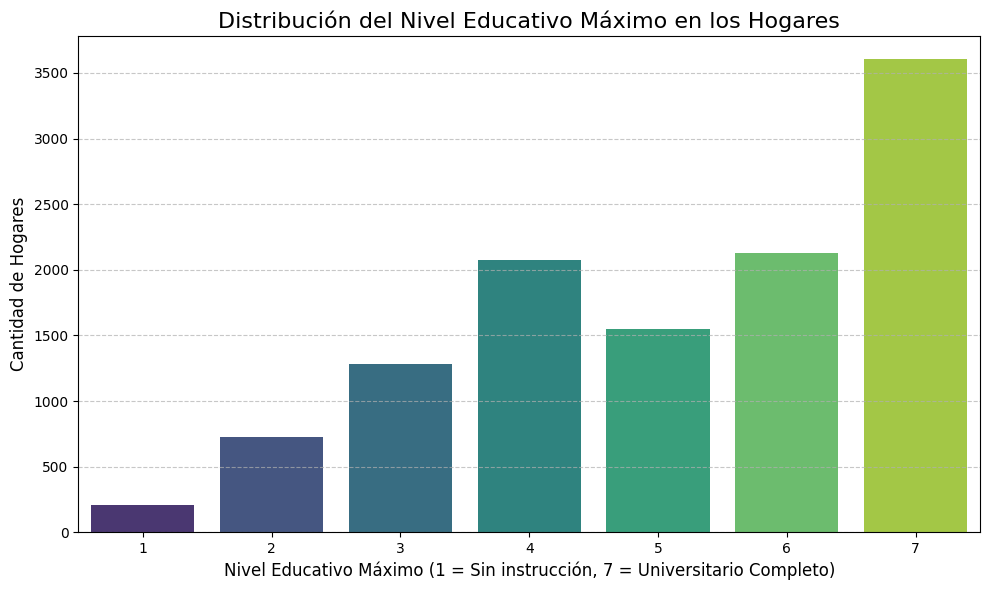

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
plt.style.use('default')

# Contar la cantidad de hogares por nivel educativo máximo
nivel_educativo_counts = df_merged['ed_max_hogar'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=nivel_educativo_counts.index, y=nivel_educativo_counts.values, palette='viridis')

# Etiquetas y título
plt.title('Distribución del Nivel Educativo Máximo en los Hogares', fontsize=16)
plt.xlabel('Nivel Educativo Máximo (1 = Sin instrucción, 7 = Universitario Completo)', fontsize=12)
plt.ylabel('Cantidad de Hogares', fontsize=12)
plt.xticks(ticks=range(0, 7), labels=['1', '2', '3','4','5','6','7'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

##PARTE 2


EJ 1

In [ ]:
# filtramos la base por año para resolver para cada año

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

datos_04 = df_merged[df_merged['anio'] == 2004]
datos_24 = df_merged[df_merged['anio'] == 2024]

# Crear variable desocupado basada en 'estado' (2 = Desocupado)
for df in [datos_04, datos_24]:
    df['desocupado'] = df['estado'].apply(lambda x: 1 if x == 2 else 0)

# Variables independientes (X) y dependiente (y)
columnas_interes = [
    'ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'cat_inac', 'ipcf',
    'iv1', 'iv2', 'ii7', 'v5', 'ii1', 'ix_tot',
    'estabilidad_vivienda', 'cobertura_hogar', 'ed_max_hogar'
]

# Para 2004
y_2004 = datos_04['desocupado']
X_2004 = datos_04[columnas_interes]

# Para 2024
y_2024 = datos_24['desocupado']
X_2024 = datos_24[columnas_interes]

# Particiones de entrenamiento y prueba
X_train_2004, X_test_2004, y_train_2004, y_test_2004 = train_test_split(X_2004, y_2004, test_size=0.3, random_state=101)
X_train_2024, X_test_2024, y_train_2024, y_test_2024 = train_test_split(X_2024, y_2024, test_size=0.3, random_state=101)

# Agregar columnad de unos
X_train_2004 = pd.concat([pd.Series(1, index=X_train_2004.index, name="Intercepto"), X_train_2004], axis=1)
X_test_2004 = pd.concat([pd.Series(1, index=X_test_2004.index, name="Intercepto"), X_test_2004], axis=1)
X_train_2024 = pd.concat([pd.Series(1, index=X_train_2024.index, name="Intercepto"), X_train_2024], axis=1)
X_test_2024 = pd.concat([pd.Series(1, index=X_test_2024.index, name="Intercepto"), X_test_2024], axis=1)

# Convertir variables categóricas a dummies
categorical_vars = ['ch04', 'ch07', 'ch08', 'nivel_ed', 'cat_inac', 'iv1', 'ii7', 'estabilidad_vivienda', 'v5']
X_train_2004 = pd.get_dummies(X_train_2004, columns=categorical_vars, drop_first=True)
X_test_2004 = pd.get_dummies(X_test_2004, columns=categorical_vars, drop_first=True)
X_train_2024 = pd.get_dummies(X_train_2024, columns=categorical_vars, drop_first=True)
X_test_2024 = pd.get_dummies(X_test_2024, columns=categorical_vars, drop_first=True)

# Chequeo final de las matrices
print("X_train_2004:")
print(X_train_2004.head())
print("\nX_train_2024:")
print(X_train_2024.head())


X_train_2004:
      Intercepto  ch06   ipcf  iv2  ii1  ix_tot  cobertura_hogar  \
6291           1  56.0  706.0  4.0  4.0     5.0              0.0   
2878           1  57.0  125.0  2.0  2.0     2.0              0.0   
5129           1  29.0  100.0  2.0  2.0     4.0              0.0   
4164           1  25.0  400.0  3.0  3.0     2.0              0.0   
3596           1  65.0  160.0  3.0  3.0     3.0              0.0   

      ed_max_hogar  ch04_2.0  ch07_2.0  ...  ii7_2.0  ii7_3.0  ii7_4.0  \
6291           6.0      True      True  ...    False    False    False   
2878           3.0      True     False  ...    False    False    False   
5129           7.0      True      True  ...    False    False    False   
4164           5.0     False      True  ...    False     True    False   
3596           1.0     False     False  ...    False    False    False   

      ii7_6.0  ii7_7.0  ii7_8.0  ii7_9.0  \
6291    False    False    False    False   
2878    False    False    False    False   


<ipython-input-48-9ad7df23c8fa>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['desocupado'] = df['estado'].apply(lambda x: 1 if x == 2 else 0)
<ipython-input-48-9ad7df23c8fa>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['desocupado'] = df['estado'].apply(lambda x: 1 if x == 2 else 0)


Punto 4)

Evaluación para el año 2004
Resultados para L1 (Año 2004):
Matriz de Confusión:
[[2104    8]
 [ 142   12]]
Accuracy: 0.9338
AUC: 0.8959
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2112
           1       0.60      0.08      0.14       154

    accuracy                           0.93      2266
   macro avg       0.77      0.54      0.55      2266
weighted avg       0.91      0.93      0.91      2266



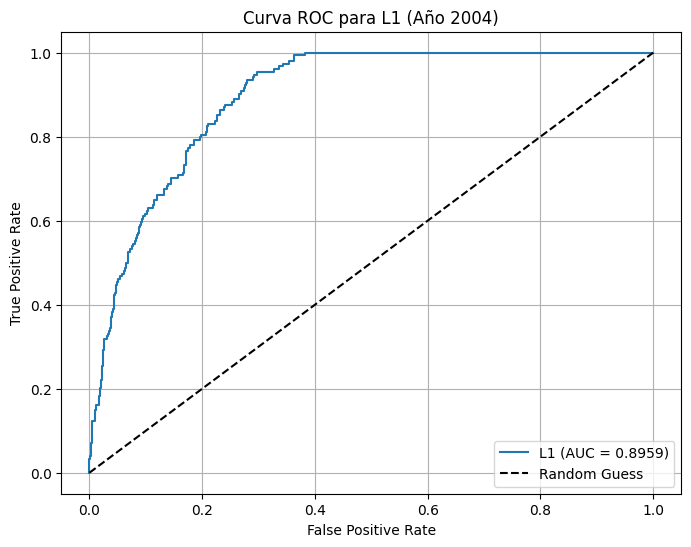

Resultados para L2 (Año 2004):
Matriz de Confusión:
[[2103    9]
 [ 141   13]]
Accuracy: 0.9338
AUC: 0.8962
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2112
           1       0.59      0.08      0.15       154

    accuracy                           0.93      2266
   macro avg       0.76      0.54      0.56      2266
weighted avg       0.91      0.93      0.91      2266



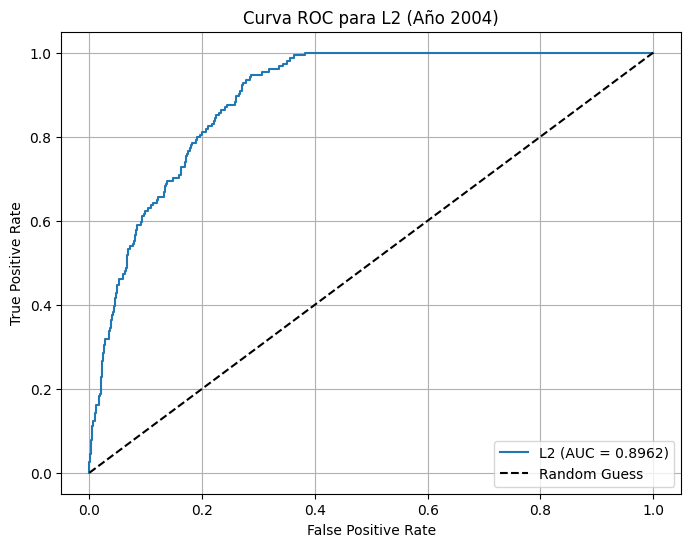

Evaluación para el año 2024
Resultados para L1 (Año 2024):
Matriz de Confusión:
[[1143    9]
 [  47    5]]
Accuracy: 0.9535
AUC: 0.9173
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1152
           1       0.36      0.10      0.15        52

    accuracy                           0.95      1204
   macro avg       0.66      0.54      0.56      1204
weighted avg       0.93      0.95      0.94      1204



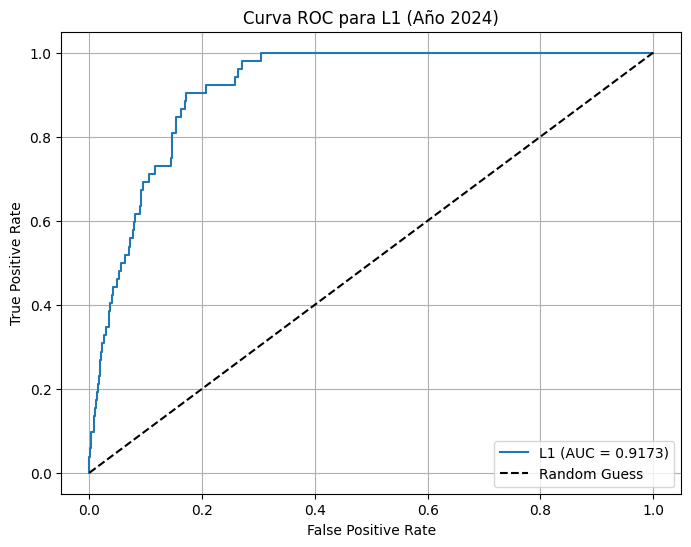

Resultados para L2 (Año 2024):
Matriz de Confusión:
[[1152    0]
 [  52    0]]
Accuracy: 0.9568
AUC: 0.7152
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1152
           1       0.00      0.00      0.00        52

    accuracy                           0.96      1204
   macro avg       0.48      0.50      0.49      1204
weighted avg       0.92      0.96      0.94      1204



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


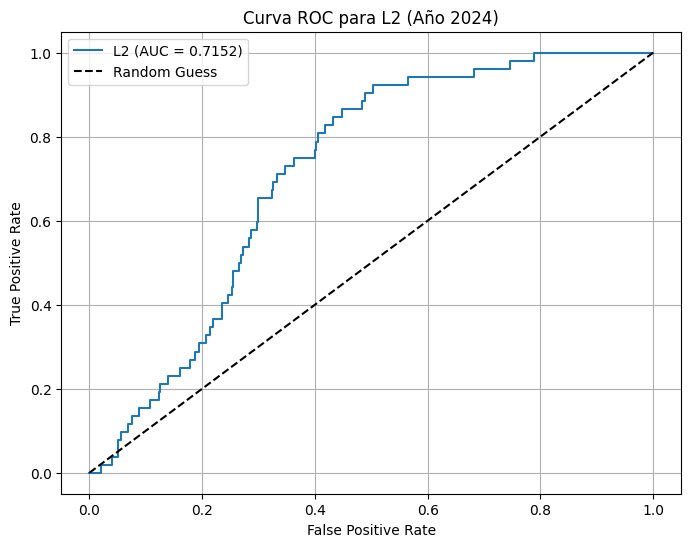

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, classification_report

# Definimos λ
lambda_ = 1
C = 1 / lambda_  # C es el inverso de λ en LR

# Función para alinear columnas entre train y test porque saltaba error
# porque una dummy estaba en train y no en test
def alinear_columnas(X_train, X_test):
    # Asegurarse de que ambas matrices tengan las mismas columnas
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
    return X_test

X_test_2004 = alinear_columnas(X_train_2004, X_test_2004)  # Alinear columnas
X_test_2024 = alinear_columnas(X_train_2024, X_test_2024)  # Alinear columnas


# definimos una funcion que entrena regresion logistica con estos parametros
def entrenar_evaluar_logit(X_train, X_test, y_train, y_test, penalty_type, year):
    # Entrenar modelo con penalización L1 o L2
    logistic_model = LogisticRegression(penalty=penalty_type, C=C, solver='liblinear', max_iter=1000)
    logistic_model.fit(X_train, y_train)

    # Predicciones y probabilidades
    y_pred = logistic_model.predict(X_test)
    y_prob = logistic_model.predict_proba(X_test)[:, 1]

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    confusion = confusion_matrix(y_test, y_pred)

    # Mostrar resultados
    print(f"Resultados para {penalty_type.upper()} (Año {year}):")
    print("Matriz de Confusión:")
    print(confusion)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc:.4f}")
    print(classification_report(y_test, y_pred))

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{penalty_type.upper()} (AUC = {auc:.4f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Curva ROC para {penalty_type.upper()} (Año {year})")
    plt.legend()
    plt.grid()
    plt.show()

# Entrenar y evaluar para 2004
print("Evaluación para el año 2004")
entrenar_evaluar_logit(X_train_2004, X_test_2004, y_train_2004, y_test_2004, penalty_type='l1', year=2004)  # L1
entrenar_evaluar_logit(X_train_2004, X_test_2004, y_train_2004, y_test_2004, penalty_type='l2', year=2004)  # L2

# Entrenar y evaluar para 2024
print("Evaluación para el año 2024")
entrenar_evaluar_logit(X_train_2024, X_test_2024, y_train_2024, y_test_2024, penalty_type='l1', year=2024)  # L1
entrenar_evaluar_logit(X_train_2024, X_test_2024, y_train_2024, y_test_2024, penalty_type='l2', year=2024)  # L2


Puntos 5 y 6

Análisis para el año 2004:
λ óptimo para Ridge (L2) en 2004: 1
λ óptimo para LASSO (L1) en 2004: 1


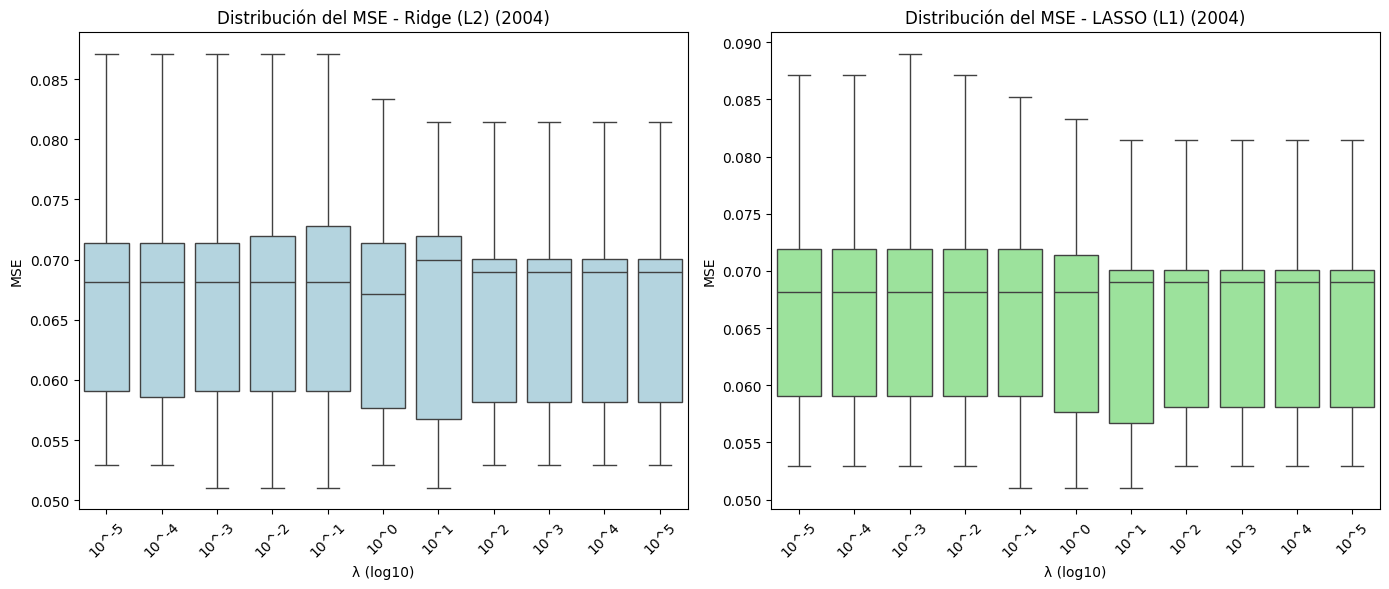

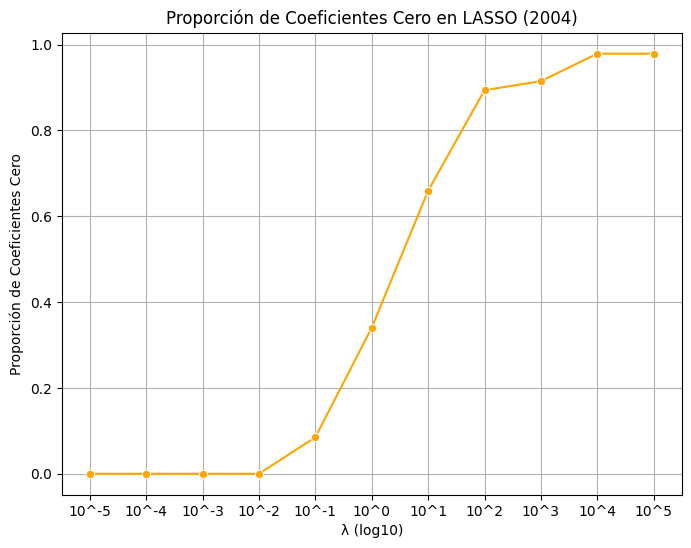

Variables descartadas por LASSO con λ óptimo (1) en 2004: ['cobertura_hogar', 'ch08_9.0', 'ch08_12.0', 'ch08_23.0', 'nivel_ed_7.0', 'cat_inac_2.0', 'cat_inac_4.0', 'cat_inac_6.0', 'cat_inac_7.0', 'iv1_4.0', 'ii7_3.0', 'ii7_6.0', 'ii7_7.0', 'ii7_9.0', 'ii7_Ocupante en relación de dependencia', 'estabilidad_vivienda_inestable']

Análisis para el año 2024:
λ óptimo para Ridge (L2) en 2024: 1e-05
λ óptimo para LASSO (L1) en 2024: 1


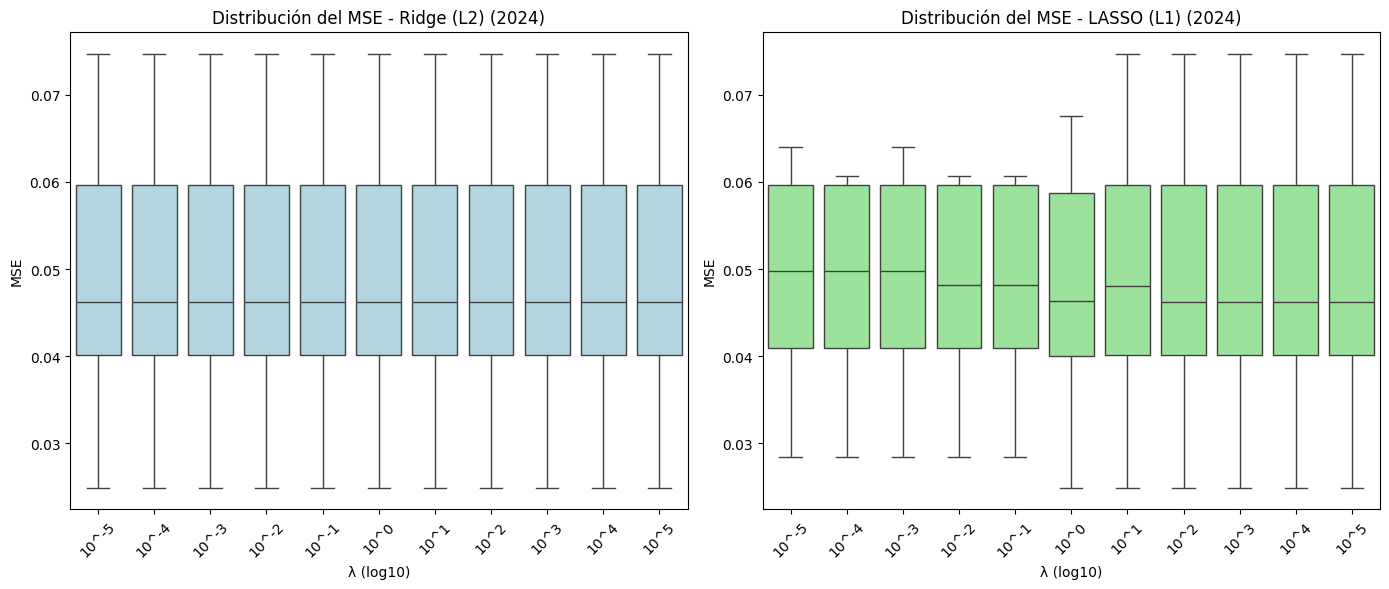

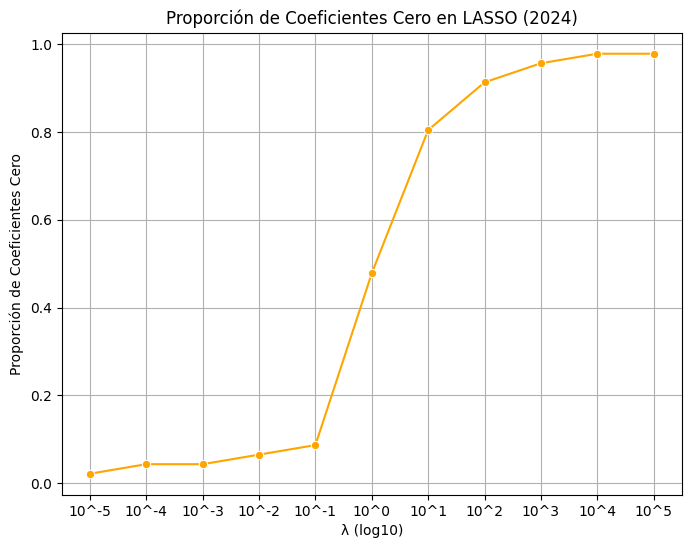

Variables descartadas por LASSO con λ óptimo (1) en 2024: ['cobertura_hogar', 'ch07_3.0', 'ch07_4.0', 'ch08_13.0', 'nivel_ed_2.0', 'nivel_ed_3.0', 'cat_inac_2.0', 'cat_inac_4.0', 'cat_inac_5.0', 'cat_inac_6.0', 'cat_inac_7.0', 'iv1_2', 'iv1_3', 'iv1_4', 'iv1_5', 'iv1_6', 'ii7_2', 'ii7_5', 'ii7_6', 'ii7_7', 'ii7_9']


In [ ]:

from sklearn.model_selection import KFold, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

#  λ (10^n con n ∈ {-5, ..., +5})
lambdas = [10**n for n in range(-5, 6)]

#  K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Función para calcular el MSE en cada partición
def calcular_mse(estimator, X, y):
    scores = cross_val_score(estimator, X, y, cv=kf, scoring='neg_mean_squared_error')
    return -scores  # Cambiamos el signo porque scikit-learn devuelve MSE negativo

# Función para realizar análisis completo para un año
def analizar_por_anio(X_train, y_train, year):
    # Crear listas para almacenar resultados
    mse_ridge = []
    mse_lasso = []
    proporcion_ceros_lasso = []

    # Iterar sobre los valores de λ
    for lambda_value in lambdas:
        C = 1 / lambda_value

        # Ridge (L2)
        ridge_model = LogisticRegression(penalty='l2', C=C, solver='liblinear', max_iter=1000)
        mse_ridge.append(calcular_mse(ridge_model, X_train, y_train))

        # LASSO (L1)
        lasso_model = LogisticRegression(penalty='l1', C=C, solver='liblinear', max_iter=1000)
        mse_lasso.append(calcular_mse(lasso_model, X_train, y_train))

        # Calcular la proporción de coeficientes cero en LASSO
        lasso_model.fit(X_train, y_train)
        proporciones_cero = np.mean(lasso_model.coef_ == 0)
        proporcion_ceros_lasso.append(proporciones_cero)

    # Seleccionar el λ óptimo para Ridge y LASSO
    mean_mse_ridge = [np.mean(mse) for mse in mse_ridge]
    mean_mse_lasso = [np.mean(mse) for mse in mse_lasso]

    lambda_opt_ridge = lambdas[np.argmin(mean_mse_ridge)]
    lambda_opt_lasso = lambdas[np.argmin(mean_mse_lasso)]

    print(f"λ óptimo para Ridge (L2) en {year}: {lambda_opt_ridge}")
    print(f"λ óptimo para LASSO (L1) en {year}: {lambda_opt_lasso}")

    # Gráficos de box plot para MSE
    plt.figure(figsize=(14, 6))

    # Box plot para Ridge
    plt.subplot(1, 2, 1)
    sns.boxplot(data=mse_ridge, orient='v', color='lightblue')
    plt.xticks(ticks=range(len(lambdas)), labels=[f"10^{n}" for n in range(-5, 6)], rotation=45)
    plt.title(f"Distribución del MSE - Ridge (L2) ({year})")
    plt.xlabel("λ (log10)")
    plt.ylabel("MSE")

    # Box plot para LASSO
    plt.subplot(1, 2, 2)
    sns.boxplot(data=mse_lasso, orient='v', color='lightgreen')
    plt.xticks(ticks=range(len(lambdas)), labels=[f"10^{n}" for n in range(-5, 6)], rotation=45)
    plt.title(f"Distribución del MSE - LASSO (L1) ({year})")
    plt.xlabel("λ (log10)")
    plt.ylabel("MSE")

    plt.tight_layout()
    plt.show()

    # Line plot para proporción de coeficientes cero en LASSO
    plt.figure(figsize=(8, 6))
    sns.lineplot(x=[f"10^{n}" for n in range(-5, 6)], y=proporcion_ceros_lasso, marker='o', color='orange')
    plt.title(f"Proporción de Coeficientes Cero en LASSO ({year})")
    plt.xlabel("λ (log10)")
    plt.ylabel("Proporción de Coeficientes Cero")
    plt.grid()
    plt.show()

    # Variables descartadas para el λ óptimo en LASSO
    optimal_lasso_model = LogisticRegression(penalty='l1', C=1/lambda_opt_lasso, solver='liblinear', max_iter=1000)
    optimal_lasso_model.fit(X_train, y_train)

    coeficientes = optimal_lasso_model.coef_.flatten()
    variables_descartadas = [var for var, coef in zip(X_train.columns, coeficientes) if coef == 0]

    print(f"Variables descartadas por LASSO con λ óptimo ({lambda_opt_lasso}) en {year}: {variables_descartadas}")

# Ejecutar análisis para 2004
print("Análisis para el año 2004:")
analizar_por_anio(X_train_2004, y_train_2004, 2004)

# Ejecutar análisis para 2024
print("\nAnálisis para el año 2024:")
analizar_por_anio(X_train_2024, y_train_2024, 2024)
